### Machine Learning With Python: Linear Regression With One Variable

#### Sample problem of predicting home price in monroe, new jersey (USA)

##### Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area

You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="scatterplot.JPG" style="width:600px;height:370px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


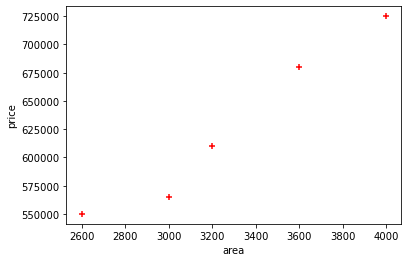

In [11]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.show()

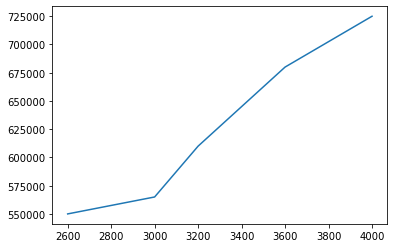

In [27]:
plt.plot(df.area,df.price)

In [12]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [13]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [14]:
# Create linear regression object
lr=LinearRegression()
lr.fit(new_df,price)

LinearRegression()

In [15]:
# Predict price of a home with area = 3300 sqr ft

lr.predict([[3300]])

array([628715.75342466])

In [16]:
lr.coef_

array([135.78767123])

In [17]:
lr.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [18]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

In [19]:
# Predict price of a home with area = 5000 sqr ft
lr.predict([[5000]])

array([859554.79452055])

In [20]:
# Generate CSV file with list of home price predictions
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [21]:
p = lr.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [22]:
area_df['Predictedprices']=p
area_df

,area,Predictedprices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [23]:
area_df.to_csv("prediction.csv")

##### Plot the Prediction and actual value

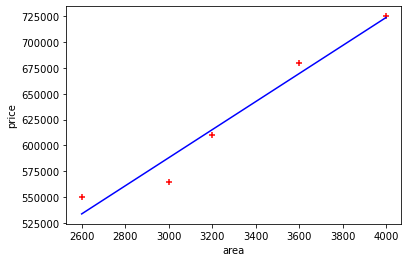

In [26]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,lr.predict(df[['area']]),color='blue')
plt.show()